In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

##### Importing the csv file

In [3]:
df = pd.read_csv('250907_01bin.csv', sep=';')
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0


## Synchronisation events (30% of the neurons are active)

Adding a sum column (number of events for each t):

In [4]:
df['n_events'] = df.ix[:, 2:].sum(axis=1)
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Percentage of active neurons

In [5]:
df['active_neurons'] = df['n_events'] / 13
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events,active_neurons
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.076923
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.076923
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000


##### Synchronization events (30% of active neurons)

In [6]:
percentage_of_active_neurons = 0.3
df[df['active_neurons'] > 0.3]

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events,active_neurons
117,2440,"40,66666667",1,1,0,0,0,0,0,0,0,1,0,1,0,4,0.307692
362,7340,"122,3333333",1,0,1,1,0,0,0,0,0,0,0,0,1,4,0.307692
425,8600,"143,3333333",0,1,1,0,1,1,0,0,0,0,0,0,0,4,0.307692
479,9680,"161,3333333",0,0,0,0,0,1,0,1,0,0,1,1,0,4,0.307692
507,10240,"170,6666667",0,0,1,0,0,1,0,0,0,0,0,1,1,4,0.307692


In [7]:
print("There are {} synchronization events with more than {}% of active neurons.".format(len(df[df['active_neurons'] > 0.3]), percentage_of_active_neurons*100))

There are 5 synchronization events with more than 30.0% of active neurons.


Adding a boolean column for the synchronisation events:

In [8]:
df['sync_events'] = False   # set a default value first
df.loc[(df['active_neurons'] > 0.3), 'sync_events'] = True
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events,active_neurons,sync_events
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,False
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,False
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.076923,False
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.076923,False
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,False


In [9]:
# Verification
#df[df['sync_events'] == True]

## All $\Delta$t (between 2 events for each neuron)

Test for one neuron

In [10]:
# print column 'sec' when neuron 'R1' has an activity
#df.loc[(df['R1'] == 1), 'sec']

In [11]:
dt_R1 = pd.DataFrame(df.loc[(df['R1'] == 1), 'sec'])
#dt_R1

In [12]:
# difference (=dt) and discard the 1st value (NaN value)
dt_R1 = dt_R1.diff()[1:]
#dt_R1.head()

In [13]:
dt_R1.mean()

sec    366.086957
dtype: float64

Analysis for all neurons

In [14]:
neuron_names = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']

In [15]:
dt_neurons = {}
for neuron_name in neuron_names:
    dt_neurons[neuron_name] = pd.DataFrame(df.loc[(df[neuron_name] == 1), 'sec'])

In [19]:
# print DataFrame df_dtR1
dt_neurons['R1'].head()

,sec
59,1280
73,1560
117,2440
136,2820
148,3060


In [18]:
#dt_neurons['R1'] = dt_neurons['R1'].diff()[1:]
#dt_neurons['R1'].head()

In [20]:
# difference (=dt) and discard the 1st value (NaN value)
for neuron_name in neuron_names:
    dt_neurons[neuron_name] = dt_neurons[neuron_name].diff()[1:]

In [21]:
dt_neurons['R1'].head()

,sec
73,280.0
117,880.0
136,380.0
148,240.0
206,1160.0


In [19]:
#dt_neurons['df_dtR1']

In [23]:
#dt_neurons

#### Summary statistics ($\Delta$t between all events for each neuron)

In [24]:
df_alldt = pd.concat(dt_neurons)
df_alldt.describe()

,sec
count,252.000000
mean,502.619048
std,451.414207
min,20.000000
25%,195.000000
50%,320.000000
75%,670.000000
max,2360.000000


In [26]:
#df_alldt

## $\Delta$t before the first synchronization event

In [27]:
tot = 0
for neuron_name in neuron_names:
    tot += len(dt_neurons[neuron_name][dt_neurons[neuron_name].index<118])
print(tot)    

34


In [28]:
#synchronization events
df[df['sync_events'] == True].index

Int64Index([117, 362, 425, 479, 507], dtype='int64')

In [29]:
sync_event_index = df[df['sync_events'] == True].index
first_sync_event = sync_event_index[0]
first_sync_event

117

The first synchronization event is at measure (=index) 117

In [30]:
# for one neuron
dt_neurons['R3'][dt_neurons['R3'].index<first_sync_event+1]

,sec
58,200.0
74,320.0


##### NOTE that neuron R13 has no activity before measure 117!!!

In [31]:
dt_neurons['R13'][dt_neurons['R13'].index<first_sync_event+1]

,sec


In [33]:
# for all neurons
dt_before_firstevent = {}
for neuron_name in neuron_names:
    dt_before_firstevent[neuron_name] = dt_neurons[neuron_name][dt_neurons[neuron_name].index<first_sync_event+1]

#### Summary statistics ($\Delta$t before the first event)

In [34]:
df_dt_before_firstevent = pd.concat(dt_before_firstevent)
df_dt_before_firstevent.describe()

,sec
count,34.000000
mean,468.235294
std,378.165192
min,20.000000
25%,200.000000
50%,280.000000
75%,595.000000
max,1280.000000


#### NOTE that this mean value is not "exact": the previous calculation is exact but the R13 neuron is not included as R13 does not have any activity before the 1st synchronization event (so the mean value should be greater!)

$\Delta$t before the 1st synchronization event is a bit smaller that the total mean value.

## First $\Delta$t after the synchronization events

In [40]:
len(sync_event_index)

5

In [104]:
# Do not contain "dt before 1st sync event"
dt_after_sync = {}
df_dt_after_sync = []
no_signal_between_2_sync_event = 0

for i, event in enumerate(sync_event_index):
    for neuron_name in neuron_names:
        if i == len(sync_event_index)-1:
            dt_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i])][0:1]  # [0:1] take only the first peak after the sync event
        else:
            dt_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i]) & (dt_neurons[neuron_name].index<sync_event_index[i+1]+1)][0:1]
            #print('{} - {}'.format(i, len(dt_but_first_after_sync[df_name])))
        try:
            df_dt_after_sync.append(dt_after_sync[neuron_name].get_values()[0,0])  # [0,0] because it is an array of array
        except:
            # discard when there is no new peak after the synchronization event (== no activity between 2 sync events)
            print('no peaks after index {} for neuron {}'.format(sync_event_index[i], neuron_name))
            no_signal_between_2_sync_event += 1
df_dt_after_sync = pd.DataFrame(df_dt_after_sync)  # concatenate before tranforming to a dataframe because the values are a list of array

no peaks after index 362 for neuron R4
no peaks after index 362 for neuron R11
no peaks after index 425 for neuron R10
no peaks after index 479 for neuron R5
no peaks after index 479 for neuron R9
no peaks after index 507 for neuron R1
no peaks after index 507 for neuron R3
no peaks after index 507 for neuron R11
no peaks after index 507 for neuron R12


In [105]:
# Number of dt we should obtain: n_neurons * n_sync_events - no_signal_between_2_sync_event
len(df_dt_after_sync) == len(neuron_names) * len(sync_event_index) - no_signal_between_2_sync_event
#len(df_dt_after_sync)

True

"no_signal_between_2_sync_event": the events must be discarded otherwise the dt would count 2 times.

#### Summary statistics ($1st \Delta$t after the synchronization events)

In [48]:
df_dt_after_sync.describe()

,0
count,56.000000
mean,741.071429
std,559.407734
min,40.000000
25%,300.000000
50%,610.000000
75%,960.000000
max,2360.000000


### Separating 2 types of neurons: neurons in the synchroniztion Vs other neurons 

Extract the name of the neurons during the sync events:

In [92]:
df_sync = df[df['sync_events'] == True]
sync_neurons = {}

for idx, row in df_sync.iterrows():
    temp = []
    for neuron_name in neuron_names:
        if row[neuron_name] == 1:
            temp.append(neuron_name)
    sync_neurons[idx] = temp
sync_neurons

{117: ['R1', 'R2', 'R10', 'R12'],
 362: ['R1', 'R3', 'R4', 'R13'],
 425: ['R2', 'R3', 'R5', 'R6'],
 479: ['R6', 'R8', 'R11', 'R12'],
 507: ['R3', 'R6', 'R12', 'R13']}

In [106]:
#for i in sync_event_index:
#    print(i, sync_neurons[i])

In [108]:
# Do not contain "dt before 1st sync event"
dt_after_sync = {}
df_dt_after_sync_for_sync_neurons = []  # dt for the neurons in the sync event
df_dt_after_sync_for_nosync_neurons = []
no_signal_between_2_sync_event = 0

for i, event in enumerate(sync_event_index):
    for neuron_name in neuron_names:
        if i == len(sync_event_index)-1:
            dt_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i])][0:1]  # [0:1] take only the first peak after the sync event
        else:
            dt_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i]) & (dt_neurons[neuron_name].index<sync_event_index[i+1]+1)][0:1]
            #print('{} - {}'.format(i, len(dt_but_first_after_sync[df_name])))
        try:
            if neuron_name in sync_neurons[event]:
                df_dt_after_sync_for_sync_neurons.append(dt_after_sync[neuron_name].get_values()[0,0])  # [0,0] because it is an array of array
            else:
                df_dt_after_sync_for_nosync_neurons.append(dt_after_sync[neuron_name].get_values()[0,0])
        except:
            # discard when there is no new peak after the synchronization event (== no activity between 2 sync events)
            print('no peaks after index {} for neuron {}'.format(sync_event_index[i], neuron_name))
            no_signal_between_2_sync_event += 1
df_dt_after_sync_for_sync_neurons = pd.DataFrame(df_dt_after_sync_for_sync_neurons)  # concatenate before tranforming to a dataframe because the values are a list of array
df_dt_after_sync_for_nosync_neurons = pd.DataFrame(df_dt_after_sync_for_nosync_neurons)

no peaks after index 362 for neuron R4
no peaks after index 362 for neuron R11
no peaks after index 425 for neuron R10
no peaks after index 479 for neuron R5
no peaks after index 479 for neuron R9
no peaks after index 507 for neuron R1
no peaks after index 507 for neuron R3
no peaks after index 507 for neuron R11
no peaks after index 507 for neuron R12


In [111]:
len(df_dt_after_sync) == len(df_dt_after_sync_for_sync_neurons) + len(df_dt_after_sync_for_nosync_neurons)

True

## $\Delta$t after each synchronization but the first $\Delta$t

In [49]:
(dt_neurons[neuron_name].index>sync_event_index[0]) & (dt_neurons[neuron_name].index<sync_event_index[1])

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False], dtype=bool)

In [30]:
#sync_event_index

In [31]:
#dt_neurons['df_dtR1'][(dt_neurons['df_dtR1'].index>sync_event_index[0]) & (dt_neurons['df_dtR1'].index<sync_event_index[0+1]+1)][1:].get_values()[:,0]

In [32]:
# number of measures
#first = 1
#tot = 0
#for i in range(len(sync_event_index)-1):
#    for df_name in df_names:
#        tot += len(dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[i]) & (dt_neurons[df_name].index<sync_event_index[i+1]+1)][first:])
#for df_name in df_names:
#    tot += len(dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[len(sync_event_index)-1])][first:])
#tot

In [134]:
# Do not contain "dt before 1st sync event"
dt_but_first_after_sync = {}
df_dt_but_first_after_sync = []

for i, event in enumerate(sync_event_index):
    for neuron_name in neuron_names:
        if i == len(sync_event_index)-1:
            dt_but_first_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i])][1:]  # [1:] does not take the first peak after the sync event (already in another dataframe)
        else:
            dt_but_first_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i]) & (dt_neurons[neuron_name].index<sync_event_index[i+1]+1)][1:]
            #print('{} - {}'.format(i, len(dt_but_first_after_sync[df_name])))
        try:
            df_dt_but_first_after_sync.append(dt_but_first_after_sync[neuron_name].get_values()[:,0])  # [:,0] because it is an array of array
        except:
            # discard when there is no new peak after the synchronization event (== no activity between 2 sync events)
            print('no peaks after index {} for neuron {}'.format(sync_event_index[i], df_name))
df_dt_but_first_after_sync = pd.DataFrame(np.concatenate(np.array(df_dt_but_first_after_sync)))  # concatenate before tranforming to a dataframe because the values are a list of array

#### Summary statistics ($\Delta$t after each synchronization but the first $\Delta$t)

In [130]:
df_dt_but_first_after_sync.describe()

,0
count,162.000000
mean,427.407407
std,394.653013
min,20.000000
25%,180.000000
50%,290.000000
75%,540.000000
max,2240.000000


Should I merge this dataframe with df_dt_before_firstevent?

In [131]:
try:
    assert len(df_alldt) == len(df_dt_before_firstevent) + len(df_dt_after_sync) + len(df_dt_but_first_after_sync)
except AssertionError:
    print("*******************************************************\n")
    print("There is an error in the analysis: the number of dt in each sub-dataframe should be equal to the number of dt in the dataframe df_alldt")
    print("*******************************************************")
else:
    print("The number of dt in each frame is correct.")

The number of dt in each frame is correct.


### Separating 2 types of neurons: neurons in the synchroniztion Vs other neurons 

In [143]:
# Do not contain "dt before 1st sync event"
dt_but_first_after_sync = {}
df_dt_but_first_after_sync_for_sync_neurons = []
df_dt_but_first_after_sync_for_nosync_neurons = []

for i, event in enumerate(sync_event_index):
    for neuron_name in neuron_names:
        if i == len(sync_event_index)-1:
            dt_but_first_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i])][1:]  # [1:] does not take the first peak after the sync event (already in another dataframe)
        else:
            dt_but_first_after_sync[neuron_name] = dt_neurons[neuron_name][(dt_neurons[neuron_name].index>sync_event_index[i]) & (dt_neurons[neuron_name].index<sync_event_index[i+1]+1)][1:]
            #print('{} - {}'.format(i, len(dt_but_first_after_sync[df_name])))
        try:
            if neuron_name in sync_neurons[event]:
                df_dt_but_first_after_sync_for_sync_neurons.append(dt_but_first_after_sync[neuron_name].get_values()[:,0])  # [:,0] because it is an array of array
            else:
                df_dt_but_first_after_sync_for_nosync_neurons.append(dt_but_first_after_sync[neuron_name].get_values()[:,0])
        except:
            # discard when there is no new peak after the synchronization event (== no activity between 2 sync events)
            print('no peaks after index {} for neuron {}'.format(sync_event_index[i], df_name))
df_dt_but_first_after_sync_for_sync_neurons = pd.DataFrame(np.concatenate(np.array(df_dt_but_first_after_sync_for_sync_neurons)))  # concatenate before tranforming to a dataframe because the values are a list of array
df_dt_but_first_after_sync_for_nosync_neurons = pd.DataFrame(np.concatenate(np.array(df_dt_but_first_after_sync_for_nosync_neurons)))

In [138]:
len(df_dt_but_first_after_sync) == len(df_dt_but_first_after_sync_for_sync_neurons) + len(df_dt_but_first_after_sync_for_nosync_neurons)

True

# Plots

Concatenate the 4 dataframes

In [54]:
# using pd.DataFrame(XXX.get_values()) to get the "same numerotation" and concatenate the 4 dataframes
df_results = pd.concat([pd.DataFrame(df_alldt.get_values()), pd.DataFrame(df_dt_before_firstevent.get_values()), df_dt_but_first_after_sync, df_dt_after_sync], axis=1)

In [55]:
df_results.columns = ['all dt', 'dt before 1st sync', 'dt after sync event but 1st dt', '1st dt after sync event']
df_results.head()

,all dt,dt before 1st sync,dt after sync event but 1st dt,1st dt after sync event
0,280.0,280.0,240.0,380.0
1,880.0,880.0,1160.0,600.0
2,380.0,840.0,300.0,920.0
3,240.0,540.0,320.0,40.0
4,1160.0,20.0,920.0,1720.0


<IPython.core.display.Javascript object>


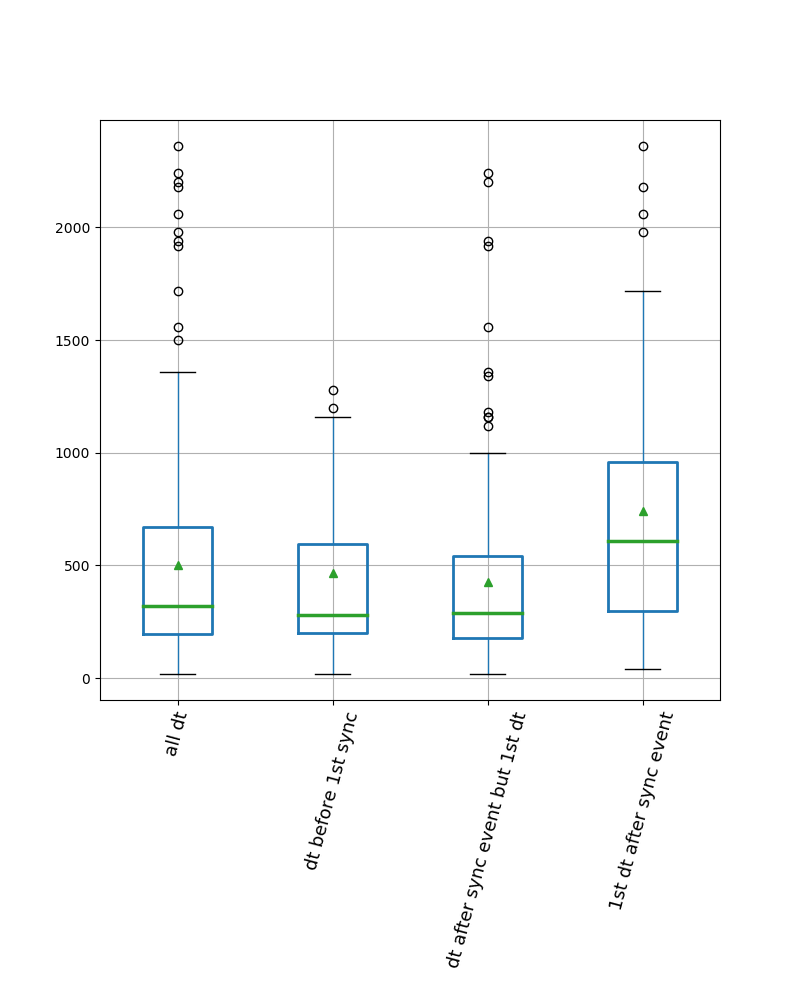

In [56]:
plt.figure(figsize=(8,10))
plt.gcf().subplots_adjust(bottom=0.30)  #to make room for the labels
boxprops = dict(linewidth=2)
medianprops = dict(linestyle='-', linewidth=2.5)

df_results.boxplot(return_type='axes', rot=75, fontsize=13, showmeans=True, boxprops=boxprops, medianprops=medianprops)

### 1st dt after sync event: separating the neurons in the sync event and the others

In [123]:
# using pd.DataFrame(XXX.get_values()) to get the "same numerotation" and concatenate the 2 dataframes
df_first_dt = pd.concat([df_dt_after_sync_for_sync_neurons, df_dt_after_sync_for_nosync_neurons], axis=1)

df_first_dt.columns = ['neurons in the sync event', 'neurons not in the sync event']
df_first_dt.head()

,neurons in the sync event,neurons not in the sync event
0,380.0,920.0
1,600.0,40.0
2,2180.0,1720.0
3,300.0,960.0
4,160.0,960.0


<IPython.core.display.Javascript object>


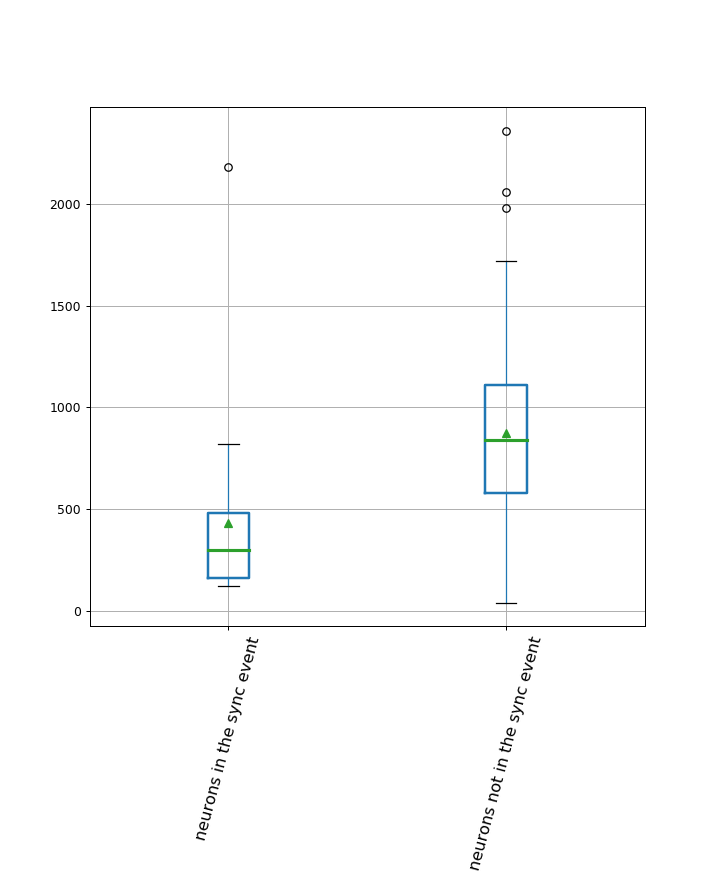

In [124]:
plt.figure(figsize=(8,10))
plt.gcf().subplots_adjust(bottom=0.30)  #to make room for the labels
boxprops = dict(linewidth=2)
medianprops = dict(linestyle='-', linewidth=2.5)

df_first_dt.boxplot(return_type='axes', rot=75, fontsize=13, showmeans=True, boxprops=boxprops, medianprops=medianprops)

First dt after a sync event: we observe a clear difference between the neurons that particpate in the sync event and the others.

### dt after sync event but 1st dt: separating the neurons in the sync event and the others

In [140]:
# using pd.DataFrame(XXX.get_values()) to get the "same numerotation" and concatenate the 2 dataframes
df_dt_but_first_dt = pd.concat([df_dt_but_first_after_sync_for_sync_neurons, df_dt_but_first_after_sync_for_nosync_neurons], axis=1)

df_dt_but_first_dt.columns = ['neurons in the sync event', 'neurons not in the sync event']
df_dt_but_first_dt.head()

,neurons in the sync event,neurons not in the sync event
0,240.0,560.0
1,1160.0,180.0
2,300.0,260.0
3,320.0,180.0
4,920.0,140.0


<IPython.core.display.Javascript object>


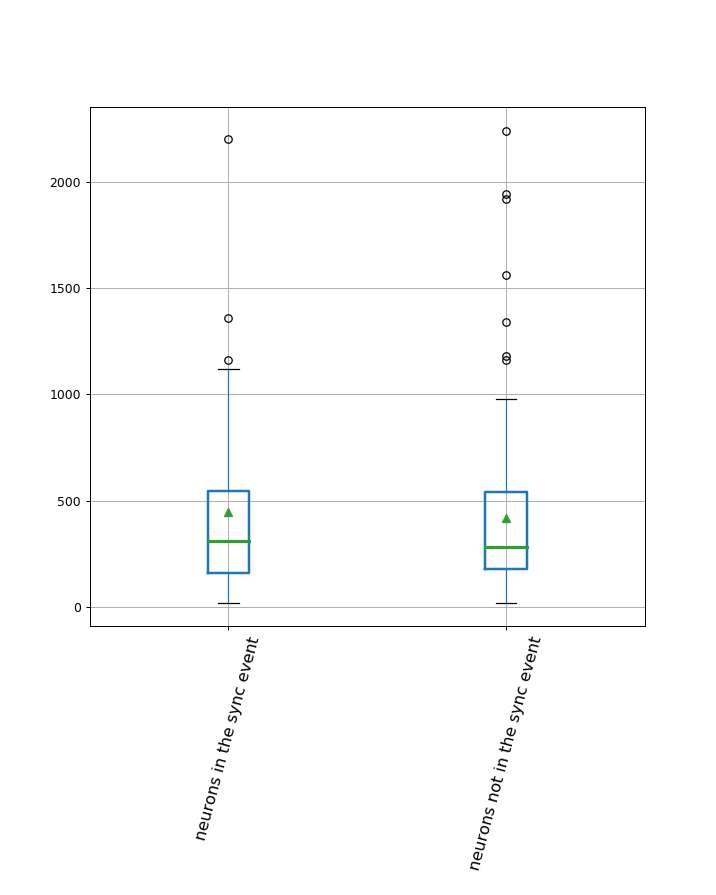

In [141]:
plt.figure(figsize=(8,10))
plt.gcf().subplots_adjust(bottom=0.30)  #to make room for the labels
boxprops = dict(linewidth=2)
medianprops = dict(linestyle='-', linewidth=2.5)

df_dt_but_first_dt.boxplot(return_type='axes', rot=75, fontsize=13, showmeans=True, boxprops=boxprops, medianprops=medianprops)

dt after a sync event but the 1st dt: this time, we observe almost no difference between the neurons that particpate in the sync event and the others.

## Summary 

In [57]:
# Problem with dropna() and describe() (all the rows with NaN are discarded)
#df_results.dropna().describe()
pd.DataFrame([df_results['all dt'].describe() , df_results['dt before 1st sync'].dropna().describe(), df_results['dt after sync event but 1st dt'].dropna().describe() , df_results['1st dt after sync event'].dropna().describe()])

,count,mean,std,min,25%,50%,75%,max
all dt,252.0,502.619048,451.414207,20.0,195.0,320.0,670.0,2360.0
dt before 1st sync,34.0,468.235294,378.165192,20.0,200.0,280.0,595.0,1280.0
dt after sync event but 1st dt,162.0,427.407407,394.653013,20.0,180.0,290.0,540.0,2240.0
1st dt after sync event,56.0,741.071429,559.407734,40.0,300.0,610.0,960.0,2360.0


### First dt after a sync event:

In [128]:
pd.DataFrame([df_first_dt['neurons in the sync event'].describe(), df_first_dt['neurons not in the sync event'].describe()])

,count,mean,std,min,25%,50%,75%,max
neurons in the sync event,17.0,434.117647,490.599873,120.0,160.0,300.0,480.0,2180.0
neurons not in the sync event,39.0,874.871795,539.506947,40.0,580.0,840.0,1110.0,2360.0


### dt after sync event but 1st dt

In [142]:
pd.DataFrame([df_dt_but_first_dt['neurons in the sync event'].describe(), df_dt_but_first_dt['neurons not in the sync event'].describe()])

,count,mean,std,min,25%,50%,75%,max
neurons in the sync event,44.0,447.272727,423.980932,20.0,160.0,310.0,545.0,2200.0
neurons not in the sync event,118.0,420.000000,384.778769,20.0,180.0,280.0,540.0,2240.0
